# Importing necessary libraries

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv("signal-data.csv")

In [3]:
df

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [4]:
df.shape

(1567, 592)

In [5]:
df.size

927664

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [10]:
df=df.fillna(df.mean())

In [11]:
df.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [12]:
df

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,...,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,...,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,...,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,...,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,...,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,...,203.172000,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,...,97.934373,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.462862,...,43.523100,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,...,93.494100,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,-1


In [13]:
df.isna().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

In [14]:
df['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

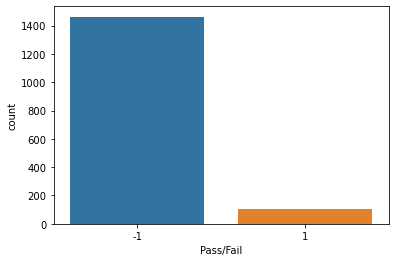

In [15]:
sns.countplot(df['Pass/Fail'])

In [16]:
#sns.pairplot(df, diag_kind= 'kde')
#plt.show()

In [17]:
cor=df.corr()
cor

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.143840,0.004756,-0.007613,-0.011014,NaN,0.002270,0.031483,-0.052622,0.009045,...,-0.017120,0.000224,0.023453,0.019907,0.023589,0.018443,-0.025880,-0.028166,0.004174,-0.025141
1,-0.143840,1.000000,0.005767,-0.007568,-0.001636,NaN,-0.025564,-0.012037,0.031258,0.023964,...,0.054006,0.043556,0.002904,-0.001264,0.002273,-0.009403,0.017266,0.010118,0.044797,-0.002603
2,0.004756,0.005767,1.000000,0.298935,0.095891,NaN,-0.136225,-0.146213,0.023528,0.016168,...,-0.007054,-0.006023,0.015697,0.018225,0.015752,-0.025495,-0.029345,-0.030818,-0.032890,-0.000957
3,-0.007613,-0.007568,0.298935,1.000000,-0.058483,NaN,-0.685835,0.073856,-0.102892,0.068215,...,-0.071311,0.008988,0.025436,0.024736,0.026019,0.034711,-0.039132,-0.033645,-0.080341,-0.024623
4,-0.011014,-0.001636,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.347734,-0.025946,0.054206,...,0.088167,0.045081,-0.001300,-0.001597,-0.001616,-0.043929,-0.031005,-0.026100,0.050910,-0.013756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.018443,-0.009403,-0.025495,0.034711,-0.043929,NaN,-0.041209,0.058113,0.010433,0.033738,...,-0.283333,-0.016726,0.002257,0.001605,0.002743,1.000000,0.167913,0.164238,-0.486559,0.004156
587,-0.025880,0.017266,-0.029345,-0.039132,-0.031005,NaN,0.034027,-0.021426,0.022845,0.059301,...,0.272404,-0.024473,-0.002649,-0.002498,-0.002930,0.167913,1.000000,0.974276,0.390813,0.035391
588,-0.028166,0.010118,-0.030818,-0.033645,-0.026100,NaN,0.032227,-0.020893,0.026250,0.060758,...,0.258745,-0.020705,-0.002260,-0.001957,-0.002530,0.164238,0.974276,1.000000,0.389211,0.031167
589,0.004174,0.044797,-0.032890,-0.080341,0.050910,NaN,0.043777,-0.107804,-0.022770,0.004880,...,0.585288,0.041486,-0.003008,-0.003295,-0.003800,-0.486559,0.390813,0.389211,1.000000,-0.002653


In [18]:
cor[cor > .90]

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.974276,NaN,NaN
588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.974276,1.000000,NaN,NaN
589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [19]:
#sns.heatmap(df.corr(),annot=True)

# Train test split

In [20]:
X = df.drop(columns= ['Pass/Fail','Time'])
y = df['Pass/Fail']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)

# Target balancing

In [22]:
sm = SMOTE(sampling_strategy= 'minority', random_state= 1 )

X_train, y_train = sm.fit_resample(X_train, y_train)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate models


In [24]:
#Build RF Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfm=rf.fit(X_train, y_train)

In [25]:
preds = rf.predict_proba(X_test)[:,1]
y_pred=rf.predict(X_test)

In [26]:
#calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def calculate_confusion_matrix(y_true, y_pred):
    cm=confusion_matrix(y_true, y_pred)
    print(cm)

In [27]:
calculate_confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

[[365   1]
 [ 26   0]]
0.9311224489795918


In [28]:
trainResult = rf.score(X_train, y_train)
testResult = rf.score(X_test, y_test)

In [29]:
"Train Accuracy:"
(trainResult*100.0)

100.0

In [30]:
"Test Accuracy:"
(testResult*100.0)

93.11224489795919

# K-fold cross-validation
#k-fold cross validation( without stratification)

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [32]:
num_folds = 10
seed = 77

In [33]:
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)

In [34]:
results = cross_val_score(rfm,X, y, cv=kfold)
results

array([0.96178344, 0.92993631, 0.91719745, 0.92356688, 0.95541401,
       0.94904459, 0.91719745, 0.90384615, 0.91666667, 0.96153846])

In [35]:
np.mean(abs(results))

0.9336191409439817

In [36]:
results.std()

0.020281639671174957

# Stratified cross-validation

In [37]:
k = 10
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k, random_state = 55,shuffle=True)
results = cross_val_score(rfm, X, y, cv = stratified_kfold)

In [38]:
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Avearge:  0.9336354728074474
Standard deviation:  0.0030244939986264576


# Bootstrapping

In [39]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [40]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [41]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.9326530612244899
Standard deviation:  0.0016921555052833506


Here crossfold validation with stratification gives equal result as Bootstrapping.

# Applying other models

In [42]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression()

In [43]:
lr_score = logreg.score(X_test, y_test)
print(f"Score : {lr_score}")

Score : 0.8571428571428571


In [44]:
pred = logreg.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,pred).ravel()

In [45]:
lr_recall = round(tp/(tp+fn), 3)   
lr_precision = round(tp/(tp+fp), 3)  
lr_specificity =round(tn/(tn+fp),3)    
type_1_error = fp    
type_2_error = fn 

In [46]:
lr_recall, lr_precision, lr_specificity, type_1_error, type_2_error

(0.115, 0.083, 0.91, 33, 23)

AUC: 0.649


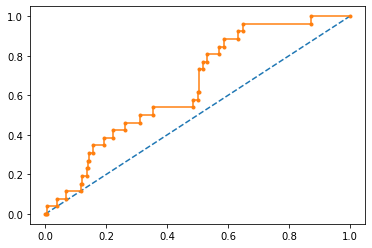

In [47]:
probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Decision Tree

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

dt_score = dt.score(X_test, y_test)
print(f"Score : {dt_score}")

pred = dt.predict(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test,pred).ravel()

Score : 0.8239795918367347


In [49]:
dt_recall = round(tp/(tp+fn), 3)   
dt_precision = round(tp/(tp+fp), 3)  
dt_specificity =round(tn/(tn+fp),3) 
dt_type_1_error = fp   
dt_type_2_error = fn 

In [50]:
dt_recall, dt_precision, dt_specificity, dt_type_1_error, dt_type_2_error

(0.462, 0.179, 0.85, 55, 14)

AUC: 0.656


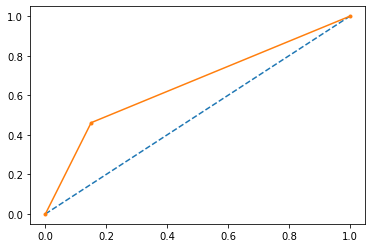

In [51]:
probs = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Random forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf.fit(X_train, y_train)

rf_score = rf.score(X_test, y_test)
print(f"Score : {rf_score}")

pred = rf.predict(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test,pred).ravel()

Score : 0.8954081632653061


In [53]:
rf_recall = round(tp/(tp+fn), 3)   
rf_precision = round(tp/(tp+fp), 3)  
rf_specificity =round(tn/(tn+fp),3) 
rf_type_1_error = fp   
rf_type_2_error = fn 

In [54]:
rf_recall, rf_precision, rf_specificity, rf_type_1_error, rf_type_2_error

(0.231, 0.222, 0.943, 21, 20)

AUC: 0.705


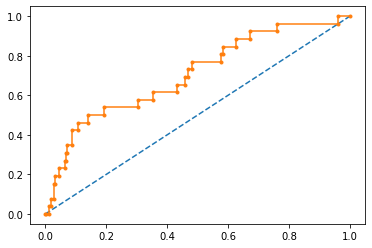

In [55]:
# show the plot
probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#Adaboost 

In [56]:
ac = AdaBoostClassifier()
ac.fit(X_train, y_train)

ac_score = ac.score(X_test, y_test)
print(f"Score : {ac_score}")

pred = ac.predict(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test,pred).ravel()

Score : 0.8673469387755102


In [57]:
ac_recall = round(tp/(tp+fn), 3)   
ac_precision = round(tp/(tp+fp), 3)  
ac_specificity =round(tn/(tn+fp),3) 
ac_type_1_error = fp   
ac_type_2_error = fn 

ac_recall, ac_precision, ac_specificity, ac_type_1_error, ac_type_2_error

(0.231, 0.158, 0.913, 32, 20)

AUC: 0.678


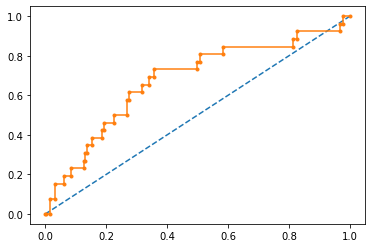

In [58]:
probs = ac.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [59]:
#Gradient Boost

In [60]:
gc = GradientBoostingClassifier()
gc.fit(X_train, y_train)

gc_score = gc.score(X_test, y_test)
print(f"Score : {gc_score}")

pred = gc.predict(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test,pred).ravel()

Score : 0.9056122448979592


In [61]:
gc_recall = round(tp/(tp+fn), 3)   
gc_precision = round(tp/(tp+fp), 3)  
gc_specificity =round(tn/(tn+fp),3) 
gc_type_1_error = fp   
gc_type_2_error = fn 

gc_recall, gc_precision, gc_specificity, gc_type_1_error, gc_type_2_error

(0.077, 0.133, 0.964, 13, 24)

AUC: 0.720


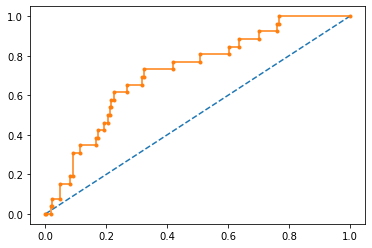

In [62]:
probs = gc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Result

In [63]:
metric = np.array([[lr_recall, lr_precision, lr_specificity],
 [dt_recall, dt_precision, dt_specificity],
 [rf_recall, rf_precision, rf_specificity],
 [ac_recall, ac_precision, ac_specificity],
 [gc_recall, gc_precision, gc_specificity]]).T
 
metric

array([[0.115, 0.462, 0.231, 0.231, 0.077],
       [0.083, 0.179, 0.222, 0.158, 0.133],
       [0.91 , 0.85 , 0.943, 0.913, 0.964]])

In [64]:
result = pd.DataFrame({'Model' : ['Logistic Regression', 'DecisionTree', 'Random Forest', 'Ada boost', "Gradient boost'"], 
                       'Accuracy' : [lr_score, dt_score, rf_score, ac_score, gc_score],
                      'Recall' : metric[0],
                      'Precision' : metric[1],
                      'Specificity' : metric[2]})
result

,Model,Accuracy,Recall,Precision,Specificity
0,Logistic Regression,0.857143,0.115,0.083,0.910
1,DecisionTree,0.823980,0.462,0.179,0.850
2,Random Forest,0.895408,0.231,0.222,0.943
3,Ada boost,0.867347,0.231,0.158,0.913
4,Gradient boost',0.905612,0.077,0.133,0.964


In [65]:
#As we are seeing here that Gradient boost model has highest accuracy(90.5%) while Decision Tree models has lowest accuracy compared
#with others

In [66]:
#here Gradient boost and Random forest both model has almost equal accuracy. So any model can we use for the prediction.

# Dimensionality Reduction

In [67]:
# We need to scale the data before using PCA which we have already done before

In [68]:
from sklearn.decomposition import PCA
#pca = PCA(10)# Initialize PCA object
pca = PCA(.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [69]:
X_train_pca = pca.transform(X_train)  # PCs for the train data
X_test_pca = pca.transform(X_test)    # PCs for the test data

X_train_pca.shape, X_test_pca.shape

((2194, 155), (392, 155))

In [70]:
pca.explained_variance_

array([27.52230215, 25.16818035, 14.3748765 , 12.82151857, 10.92001938,
       10.69800095,  9.71343201,  9.21883644,  8.76697434,  8.19356159,
        7.88317186,  7.78354302,  6.98343741,  6.65120489,  6.39546052,
        6.2651624 ,  6.0364038 ,  5.77927747,  5.60012663,  5.37253226,
        5.14706808,  5.10925176,  5.01886714,  4.95094394,  4.78769994,
        4.66599289,  4.53517656,  4.47216004,  4.31968926,  4.24133515,
        4.13192338,  4.08110444,  3.97786666,  3.92593622,  3.80189511,
        3.72255738,  3.68594912,  3.63533809,  3.52054503,  3.42090279,
        3.36626384,  3.32576198,  3.19381624,  3.16591532,  3.07163796,
        2.99805538,  2.89123617,  2.87264901,  2.82245156,  2.79820271,
        2.77486886,  2.70977439,  2.64836831,  2.64205704,  2.53022864,
        2.51192259,  2.44975363,  2.44446995,  2.4166038 ,  2.39265327,
        2.32543358,  2.31283811,  2.28718845,  2.21739308,  2.15250547,
        2.11848048,  2.06903994,  2.05639005,  1.99786156,  1.99

In [71]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
score9 = lr.score(X_test_pca, y_test)


dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train)
score10 = dt.score(X_test_pca, y_test)

rf = RandomForestClassifier(bootstrap = True, max_depth = 5, max_features ='auto', min_samples_leaf = 1, n_estimators = 100)
rf.fit(X_train_pca, y_train)
score11 = rf.score(X_test_pca, y_test)

In [72]:
score11

0.9285714285714286

In [73]:
lr = LogisticRegression()
score12 = cross_val_score(lr,X_train_pca, y_train , cv = 10).mean()

dt = DecisionTreeClassifier()
score13 = cross_val_score(dt, X_train_pca, y_train, cv = 10).mean()

rf = RandomForestClassifier(bootstrap = True, max_depth = 5, max_features ='sqrt', min_samples_leaf = 1, n_estimators = 100)
score14 = cross_val_score(rf, X_train_pca, y_train, cv = 10).mean()

In [74]:
result = pd.DataFrame({'Algorithm' : ['Logistic Regression', 'Decision Tree', 'Random Forest'],
                      'Accuracy_score': [score9, score10, score11],
                      'Cross_val_score' : [score12, score13, score14]})
result

,Algorithm,Accuracy_score,Cross_val_score
0,Logistic Regression,0.813776,0.929790
1,Decision Tree,0.885204,0.930729
2,Random Forest,0.928571,0.988601


# Importing the Future prediction data

In [75]:
dff=pd.read_excel("Future_predictions.xlsx")
dff=dff.drop(columns=['Time'])
dff=dff.fillna(dff.mean())

In [76]:
dff.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
585    0
586    0
587    0
588    0
589    0
Length: 590, dtype: int64

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_test = scaler.fit_transform(dff)

#X_test = scaler.transform(dff)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred = rf.predict(X_test)

In [79]:
# so as here we have seen that first we imported the data, after that done Data cleansing, then Data analysis & visualisation of the
#the data, where we have seen that how features are related with each others.Also we have done statistical analysis on the data
# and changed missing values with their mean values.then we have segregated the data into training and testing. and done target balancing by smote method
# also we have scaled the data and applied different models and seen the accuracy of each models.also we have applied different cross-validaton
#on it.and compared the performance of each model So here I have applyied Random forest model on this data because as we have seen above that Random forest and Gradient boost both 
# the model have almost same accuracy